**Import main** **libraires**

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Loading and reading the data**

In [148]:
df=pd.read_csv('/content/demand_inventory.csv')

In [149]:
df.head()

,Unnamed: 0,Date,Product_ID,Demand,Inventory
0,0,2023-06-01,P1,51,5500
1,1,2023-06-02,P1,141,5449
2,2,2023-06-03,P1,172,5308
3,3,2023-06-04,P1,91,5136
4,4,2023-06-05,P1,198,5045


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  62 non-null     int64 
 1   Date        62 non-null     object
 2   Product_ID  62 non-null     object
 3   Demand      62 non-null     int64 
 4   Inventory   62 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


**Handling missing and null values**

In [151]:
df.drop('Unnamed: 0',axis='columns',inplace=True) #dropping unnecssary column

In [152]:
pd.to_datetime(df['Date'])#converting date column data type

,Date
0,2023-06-01
1,2023-06-02
2,2023-06-03
3,2023-06-04
4,2023-06-05
...,...
57,2023-07-28
58,2023-07-29
59,2023-07-30
60,2023-07-31


In [153]:
df.isnull().sum() #checking for null values

,0
Date,0
Product_ID,0
Demand,0
Inventory,0


**Data visualisation**

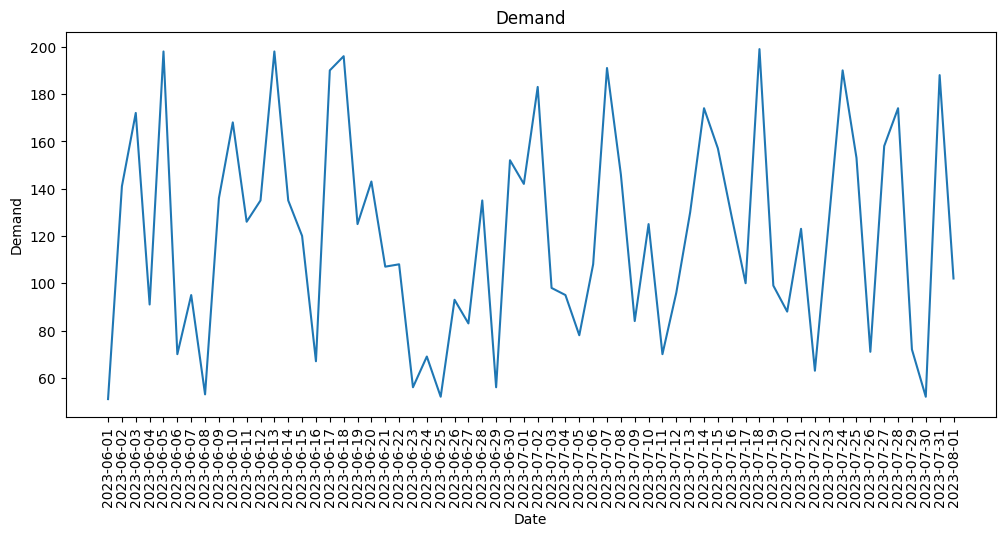

In [154]:
fig=plt.figure(figsize=(12,5))
sns.lineplot(x='Date',y='Demand',data=df)
plt.xticks(rotation=90)
plt.title('Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

We can see that there is seasonal pattern in the demand

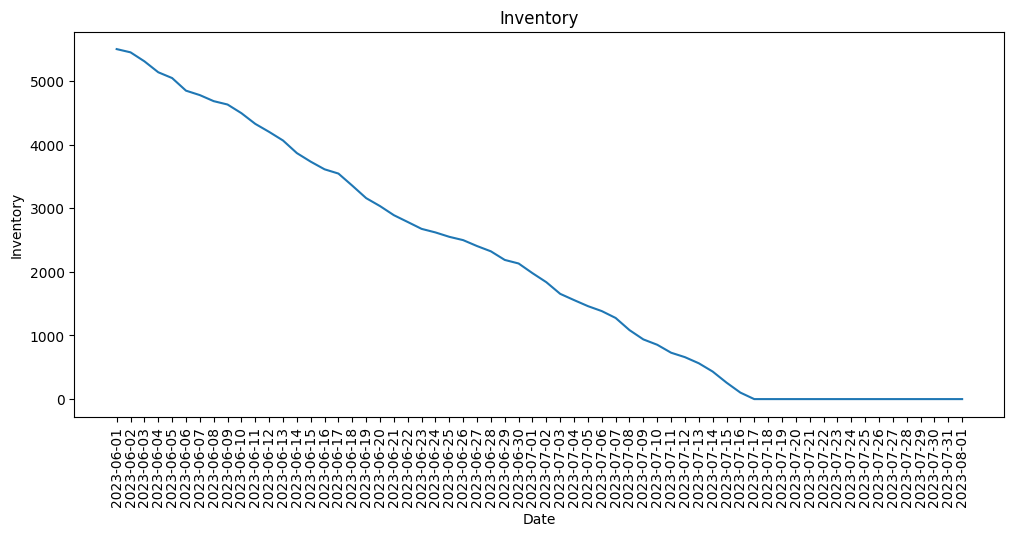

In [155]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Date',y='Inventory',data=df)
plt.xticks(rotation=90)
plt.title('Inventory')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.show()

In [156]:
df.set_index('Date',inplace=True)

Clearly the inventory levels graph is in declining nature

Model Training using Time series SARIMAX

In [157]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error


In [158]:
# Train SARIMAX model
# Define the order of the ARIMA model (p, d, q)
model = SARIMAX(df['Demand'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                            Demand   No. Observations:                   62
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood                -316.472
Date:                           Sun, 20 Oct 2024   AIC                            642.944
Time:                                   12:46:06   BIC                            653.332
Sample:                               06-01-2023   HQIC                           646.999
                                    - 08-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1213      0.178      0.680      0.496      -0.228       0.471
ma.L1         -0.9988      7.065     -0.141

**Forecasting**

In [159]:
forecast = model_fit.forecast(steps=30)
print(forecast)

2023-08-02    117.116352
2023-08-03    116.815049
2023-08-04    130.939605
2023-08-05    114.949909
2023-08-06    128.937954
2023-08-07    115.346713
2023-08-08    129.351664
2023-08-09    115.387844
2023-08-10    129.390110
2023-08-11    115.484079
2023-08-12    129.486760
2023-08-13    115.571765
2023-08-14    129.574381
2023-08-15    115.660776
2023-08-16    129.663403
2023-08-17    115.749583
2023-08-18    129.752208
2023-08-19    115.838421
2023-08-20    129.841046
2023-08-21    115.927254
2023-08-22    129.929879
2023-08-23    116.016088
2023-08-24    130.018713
2023-08-25    116.104921
2023-08-26    130.107547
2023-08-27    116.193755
2023-08-28    130.196380
2023-08-29    116.282589
2023-08-30    130.285214
2023-08-31    116.371423
Freq: D, Name: predicted_mean, dtype: float64


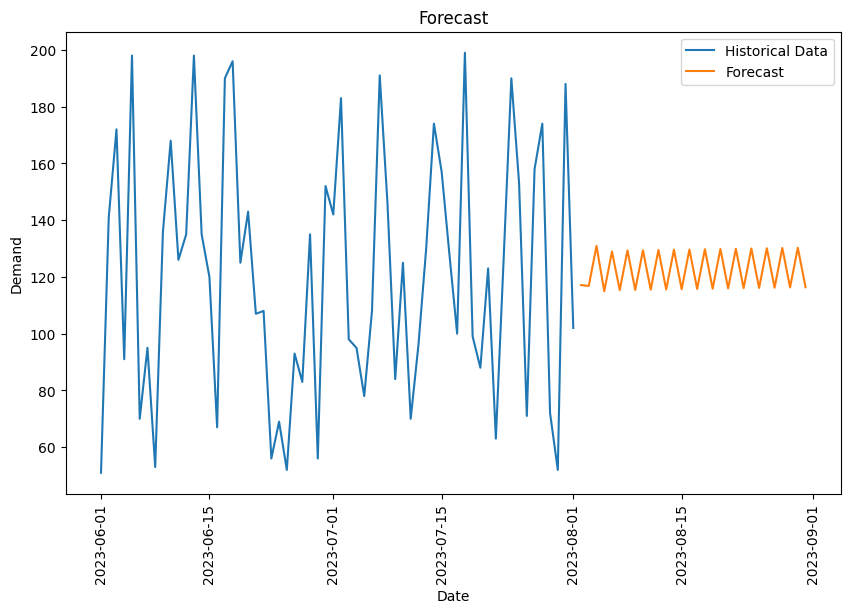

In [183]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['Demand'], label='Historical Data')
plt.xticks(rotation=90)
sns.lineplot(x=pd.to_datetime(forecast.index), y=forecast, label='Forecast')

plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

**Model Prediction**

In [ ]:
prediction=model_fit.predict(start=len(df),end=len(df)+30)
prediction= prediction.astype(int)
print(prediction)

**Inventory Optimisation**

In [ ]:
# Create date indices for the future predictions
future_dates = pd.date_range(start=pd.to_datetime(df.index[-1]) + pd.DateOffset(days=1), periods=30, freq='D')

# Create a pandas Series with the predicted values and date indices
forecasted_demand = pd.Series(prediction, index=future_dates)

# Initial inventory level
initial_inventory = 5500

# Lead time (number of days it takes to replenish inventory)
lead_time = 1 # it's different for every business, 1 is an example

# Service level (probability of not stocking out)
service_level = 0.95 # it's different for every business, 0.95 is an example

z = 1.96 if service_level == 0.95 else 2.58 if service_level == 0.999 else 3.29 if service_level == 0.9999 else None

# Calculate the optimal order quantity using the Newsvendor formula
order_quantity = np.ceil(forecasted_demand.mean() + z).astype(int)

# Calculate the reorder point
reorder_point = forecasted_demand.mean() * lead_time + z

# Calculate the optimal safety stock
safety_stock = reorder_point - forecasted_demand.mean() * lead_time

# Calculate the total cost (holding cost + stockout cost)
holding_cost = 0.1  # it's different for every business, 0.1 is an example
stockout_cost = 10  # # it's different for every business, 10 is an example
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity)
total_stockout_cost = stockout_cost * np.maximum(0, forecasted_demand.mean() * lead_time - initial_inventory)

# Calculate the total cost
total_cost = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity)
print("Reorder Point:", reorder_point)
print("Safety Stock:", safety_stock)
print("Total Cost:", total_cost)


**Optimal Order Quantity**: Order 237 units to minimize inventory costs while balancing holding and stockout costs.

**Reorder Point:** Reorder when inventory drops to approximately 237 units to avoid stockouts.

**Safety Stock**: Maintain about 115 units as a buffer for demand variability and lead time, ensuring a 95% service level.

**Total Cost**: The total expenditure is 561.85, reflecting combined holding and stockout costs.

**Demand Forecasting **involves predicting the quantity and pattern of customer orders, which is crucial for businesses to efficiently allocate resources, manage inventory, and plan production.

**Inventory Optimization** aims to strike a balance between having sufficient stock to meet demand without carrying excess inventory that ties up capital and storage space